In [183]:
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, YFinance, StrategyConfig, portfolio, context
import talib
from datetime import datetime , timedelta
import pandas as pd
import numpy as np

pyb.enable_data_source_cache('rebalancing')
#p = portfolio.Portfolio(10000)
config = StrategyConfig(initial_cash=100_00)


securities = ["PSQ" , "QQQ" , "QLD" , "SHY" ,"SPY"]



In [184]:
rsi_10 = pyb.indicator('rsi_10', lambda data: talib.RSI(data.adj_close, timeperiod=10))

mva_200 = pyb.indicator("mva_200", lambda data : talib.SMA(data.adj_close , timeperiod=200))
mva_20 =  pyb.indicator("mva_20", lambda data : talib.SMA(data.adj_close , timeperiod=20))






#securities =  ['AMAT', 'ASML', 'DMLP', 'EXPD', 'EXPI', 'INMD', 'LSTR', 'LULU', 'META', 'MSB', 'MSFT', 'RVLV', 'SIMO', 'SMLR', 'STKS', 'TER', 'VALE', 'ULTA']

start_date = "01/01/20"
end_date = "01/01/23"

yf = YFinance()
start_date_temp = datetime.strptime(start_date, "%m/%d/%y")

# Convert start date string to datetime object

# Add 60 days

spy_start_date = start_date_temp - timedelta(days=250)

psq_start_date = start_date_temp - timedelta(days=30)

rsis_10 = {}
for s in securities:
    data =  yf.query(s, psq_start_date, end_date)
    rsis_10[s] = rsi_10(data)



spy = yf.query("SPY", spy_start_date, end_date)

qqq = yf.query("QQQ", psq_start_date, end_date)

qqq_sma = mva_20(qqq)
spy_sma = mva_200(spy)









    



Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.



In [185]:
set_inital_allocs = {
    "PSQ": 0, 
    "QQQ": 0 , 
    "QLD": 0, 
    "SHY": 0,
    "SPY": 0
}


start_0 = start_date_temp - timedelta(days=2)
# Convert end date to string format

start_0 = start_0.strftime("%Y-%m-%d")

if spy_sma.loc[start_0] <  spy[spy["date"]==start_0]["open"].values[0]:
    if rsis_10["QQQ"].loc[start_0] >  81:

        set_inital_allocs['PSQ'] = 1.0

    else:

        set_inital_allocs['QQQ'] = 1.0

else:
      if rsis_10["QQQ"].loc[start_0] <  30:
        set_inital_allocs['QLD'] = 1.0

      else:
        if rsis_10["SPY"].loc[start_0] < 30:
            set_inital_allocs['SPY'] = 1.0


        else:
           if qqq_sma.loc[start_0] >  qqq[qqq["date"]==start_0]["open"].values[0]:
             
              rsi_shy = rsis_10["SHY"].loc[start_0]
              rsi_psq = rsis_10["PSQ"].loc[start_0]

              if rsi_shy > rsi_psq:
                set_inital_allocs["SHY"] = 1.0

              else:

                set_inital_allocs["PSQ"] = 1.0
           else:
            set_inital_allocs["QQQ"] = 1.0




In [73]:
set_inital_allocs

{'PSQ': 0, 'QQQ': 1.0, 'QLD': 0, 'SHY': 0, 'SPY': 0}

In [186]:
spy

,date,symbol,open,high,low,close,volume,adj_close
0,2019-04-26,SPY,292.100006,293.489990,291.239990,293.410004,50916400,273.650757
1,2019-04-29,SPY,293.510010,294.450012,293.410004,293.869995,57197700,274.079773
2,2019-04-30,SPY,293.489990,294.339996,291.920013,294.019989,81111700,274.219696
3,2019-05-01,SPY,294.720001,294.950012,291.799988,291.809998,71671900,272.158539
4,2019-05-02,SPY,291.679993,292.700012,289.519989,291.179993,65030200,271.570923
...,...,...,...,...,...,...,...,...
924,2022-12-23,SPY,379.649994,383.059998,378.029999,382.910004,59857300,380.042480
925,2022-12-27,SPY,382.790009,383.149994,379.649994,381.399994,51638200,378.543793
926,2022-12-28,SPY,381.329987,383.390015,376.420013,376.660004,70911500,373.839264
927,2022-12-29,SPY,379.630005,384.350006,379.079987,383.440002,66970900,380.568512


In [244]:
trigs = []

cur2=[]
dates=[]
TOTAL =[]
allocs = {}
    #print(((ctxs["TSLA"]._curr_date)))
def shell(ctxs:dict[str, ExecContext]):
    #print(ctxs)
    pass 
    

def buy_low(ctxs: dict[str, ExecContext]):
    # If shares were already purchased and are currently being held, then return.
    
    triggered = False 

    

    #for c in list(ctxs.keys()):
      #  pos = ctxs[c].long_pos()
       # if pos:
       #  cur_port_val += float(ctxs[c].open*float(pos.shares))

   # print(type(cur_port_val))

    dt = tuple(ctxs.values())[0].dt
    date_object = datetime.strptime(str(dt), "%Y-%m-%d %H:%M:%S")

# Convert datetime object to the desired format
    dt2 = date_object.strftime("%Y-%m-%d")
    st0 = start_date_temp.strftime("%Y-%m-%d")
    st0 = str(st0)
    #print(dt2)
    #print(dt2)

    expected_alloc = {}

    for e in securities:
        expected_alloc[e] = 0


    if spy_sma.loc[dt2] <  spy[spy["date"]==dt2]["open"].values[0]:
     print(spy_sma.loc[dt2])
     if rsis_10["QQQ"].loc[dt2] >  81:

        expected_alloc['PSQ'] = 1.0

     else:

        expected_alloc['QQQ'] = 1.0

    else:
      if rsis_10["QQQ"].loc[dt2] <  30:
        expected_alloc['QLD'] = 1.0

      else:
        if rsis_10["SPY"].loc[dt2] < 30:
            expected_alloc['SPY'] = 1.0


        else:
           if qqq_sma.loc[dt2] >  qqq[qqq["date"]==dt2]["open"].values[0]:
             
              rsi_shy = rsis_10["SHY"].loc[dt2]
              rsi_psq = rsis_10["PSQ"].loc[dt2]

              if rsi_shy > rsi_psq:
                expected_alloc["SHY"] = 1.0

              else:

                expected_alloc["PSQ"] = 1.0
           else:
            expected_alloc["QQQ"] = 1.0


    allocs[dt2] = expected_alloc
    #print(expected_alloc)
    if dt2 == "2020-01-02":
       #print("DT2 " ,dt2)

       cur_alloc = {e:0 for e in ctxs.keys()}

       for c in cur_alloc.keys():
          if cur_alloc[c] > 0:
            shares_init = ctxs[c].calc_target_shares(cur_alloc[c]) 
            ctxs[c].buy_shares = shares_init
            print("Bought ")



    else:
        total_eq = 0
        cur_alloc = {}
        #position_x=0
        #totals=[]
        for s in securities:
            #totals.append(ctxs[s].total_equity)

            #print("Here man !!!!!")
            pos =ctxs[s].long_pos()
        
            if pos:
                positions_x = pos.shares 
                #print("XXXXXXXXXX" ,pos.shares)
            else:
                positions_x = 0
            #print(total_eq)

            total_eq  += (ctxs[s].adj_close[0] * float(positions_x))

        TOTAL.append(total_eq)
        #print("Total is ", total_eq)
        for se in securities:
            pos =ctxs[se].long_pos()
            if pos:
                positions_x = pos.shares 
            else:
                positions_x = 0
            
            #print(positions_x)
 
            ca = (ctxs[se].adj_close[0] * float(positions_x)) / float(total_eq)
            cur_alloc[se] = ca

        #totalss.append(totals)
    print(cur_alloc)
    #cout=
    for ct in securities:
     #print("Val is ", abs(expected_alloc[ct] - cur_alloc[ct]) )
      #cout+=1
      #print("Cout ", cout
      
      if abs(expected_alloc[ct] - cur_alloc[ct])  >= 0.12*expected_alloc[ct]:
        #print("Diff is ",abs(expected_alloc[ct] - cur_alloc[ct]))
        #print(dt2)

        triggered= True 
        #print("Val is " , abs(expected_alloc[ct] - cur_alloc[ct])  )
        

        #print("triggered")
    


    if triggered:
        #trigs.append("x")
        print(dt2)
        dates.append(dt2)
        #print(expected_alloc)
        for e in expected_alloc.keys():
            shares = ctxs[e].calc_target_shares(expected_alloc[e],price = ctxs[e].adj_close[0])
            pos = ctxs[e].long_pos()

            if not pos: 
              ctxs[e].buy_shares = shares
              #print("Bought all" , e)
            elif pos.shares < shares:
               ctxs[e].buy_shares = shares - pos.shares
               #print("Bought ")
            else:
               ctxs[e].sell_shares = pos.shares - shares  
               #print("Sold some ")
    
    else:

        pass

            
strategy = Strategy(YFinance(), start_date=start_date, end_date=end_date, config=config)
strategy.set_before_exec(buy_low)
strategy.add_execution(shell, securities)

#strategy.add_execution(short_high, ['MSFT'])

result = strategy.backtest()





Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 756) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  6% (51 of 756) |#                      | Elapsed Time: 0:00:00 ETA:  00:00:00
 14% (111 of 756) |###                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 23% (181 of 756) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:00


{'QLD': 0, 'SPY': 0, 'QQQ': 0, 'PSQ': 0, 'SHY': 0}
2020-01-02
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-03
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-06
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-07
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-08
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-09
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-10
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-13
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-14
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-15
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-16
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-17
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-21
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-01-22
{'

 33% (251 of 756) |#######               | Elapsed Time: 0:00:00 ETA:   0:00:00
 42% (321 of 756) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 51% (391 of 756) |###########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 60% (461 of 756) |#############         | Elapsed Time: 0:00:00 ETA:   0:00:00


308.12748527526855
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-12-30
308.79386878967284
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2020-12-31
309.43331024169925
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2021-01-04
310.13402450561523
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2021-01-05
310.87327445983885
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2021-01-06
311.54314788818357
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2021-01-07
312.20610916137696
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2021-01-08
312.78811431884765
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2021-01-11
313.40752685546875
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2021-01-12
313.9926915740967
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2021-01-13
314.59000564575194
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2021-01-14


 70% (531 of 756) |###############       | Elapsed Time: 0:00:00 ETA:   0:00:00
 78% (591 of 756) |#################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 84% (641 of 756) |##################    | Elapsed Time: 0:00:00 ETA:   0:00:00



{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-03
425.2218428039551
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-04
425.6259129333496
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-05
426.03740753173827
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-06
426.429327545166
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-07
426.78805267333985
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-10
427.168450012207
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-11
427.5601254272461
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-12
427.91237274169924
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-13
428.24485443115236
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-14
428.509345703125
{'PSQ': 0.0, 'QQQ': 1.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-01-18
428.75185028076174
{'PSQ':

 92% (701 of 756) |####################  | Elapsed Time: 0:00:00 ETA:   0:00:00


{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-15
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-16
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-19
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-20
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-21
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-22
{'PSQ': 0.0, 'QQQ': 0.0, 'QLD': 1.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-23
{'PSQ': 0.0, 'QQQ': 0.0, 'QLD': 1.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-26
{'PSQ': 0.0, 'QQQ': 0.0, 'QLD': 1.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-27
{'PSQ': 0.0, 'QQQ': 0.0, 'QLD': 1.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-28
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-29
{'PSQ': 0.0, 'QQQ': 0.0, 'QLD': 1.0, 'SHY': 0.0, 'SPY': 0.0}
2022-09-30
{'PSQ': 0.0, 'QQQ': 0.0, 'QLD': 1.0, 'SHY': 0.0, 'SPY': 0.0}
2022-10-03
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
202

 99% (751 of 756) |##################### | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (756 of 756) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



2022-12-21
{'PSQ': 0.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 1.0, 'SPY': 0.0}
2022-12-22
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-12-23
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-12-27
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-12-28
{'PSQ': 0.0, 'QQQ': 0.0, 'QLD': 1.0, 'SHY': 0.0, 'SPY': 0.0}
2022-12-29
{'PSQ': 1.0, 'QQQ': 0.0, 'QLD': 0.0, 'SHY': 0.0, 'SPY': 0.0}
2022-12-30

Finished backtest: 0:00:01


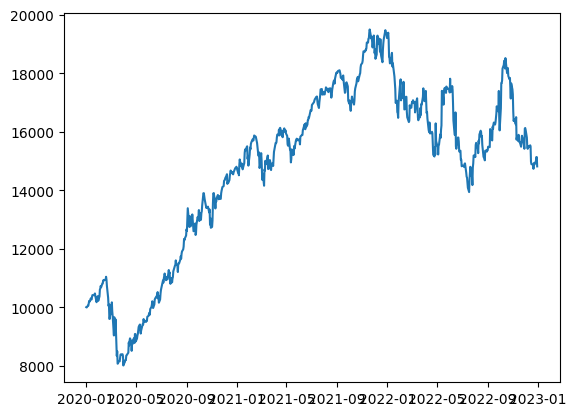

In [245]:
import matplotlib.pyplot as plt
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])




In [243]:
result.portfolio

,cash,equity,margin,market_value,pnl,unrealized_pnl,fees
date,,,,,,,
2020-01-02,10000.00,10000.00,0.0,10000.00,0.00,0.0,0.0
2020-01-03,138.52,9990.80,0.0,9990.80,-9.20,0.0,0.0
2020-01-06,138.52,10054.28,0.0,10054.28,54.28,0.0,0.0
2020-01-07,138.52,10052.90,0.0,10052.90,52.90,0.0,0.0
2020-01-08,138.52,10127.42,0.0,10127.42,127.42,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23,5497.87,14631.05,0.0,14631.05,4631.05,0.0,0.0
2022-12-27,5497.87,14761.88,0.0,14761.88,4761.88,0.0,0.0
2022-12-28,5497.87,14892.71,0.0,14892.71,4892.71,0.0,0.0


In [204]:
qld = yf.query("QLD", "01/01/20" , "01/01/23")

Loaded cached bar data.



<Axes: xlabel='date'>

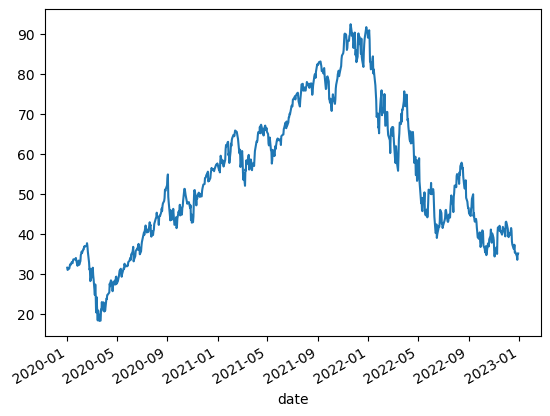

In [206]:
qld =qld.set_index("date")

qld["close"].plot()

In [221]:
qld.loc["2021-05-24"]

symbol             QLD
open         62.044998
high         63.639999
low             61.895
close           63.215
volume         3234000
adj_close    63.029823
Name: 2021-05-24 00:00:00, dtype: object

In [111]:
s1 = set(result.trades["entry_date"].unique())

s2 = set(result.trades["exit_date"].unique())



len(list(s1.union(s2)))

84

In [49]:
len(dates)

83

In [173]:
 if ctxs["SPY"].indicator("cmma_20")[-1]  < ctxs["SPY"].open:
                 if ctxs["QQQ"].indicator("rsi")[-1] > 81:
                     ctxs["PSQ"].buy_shares = n 
                 else:
                     ctxs["QQQ"].buy_shares = n 
             else:
                 if ctxs["QQQ"].indicator("rsi_30") < 30:
                      ctxs["QLD"].buy_shares = n 
                 else:
                     if ctxs["SPY"].indicator("rsi") < 30:
                         ctxs["SPY"].buy_shares = n
                     else:
                         if current_price["QQQ"] <  20_Day_mv_avg("QQQ"):
                               if ([ctxs["PSQ"].rsi[-1] > ctxs["SHY"].rsi[-1]]):
                                   ctxs["PSQ"].buy_shares = n 
                               else:
                                   ctxs["SHY"].buy_shares = n 

                         else:
                             ctxs["QQQ"].buy_shares = n

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)